In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
from runner import Runner

In [4]:
R = Runner(verbose=False)

*** GP2 ***
Working directory: /tmp/tmpiwe1g5pdGP2


In [5]:
# load our larger toy dataset (10k images and masks)

images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')


# images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE/images.npy')
# masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE/labels.npy')

In [6]:
masks.shape

(10000, 512, 512, 1)

In [7]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [8]:
#
#
R.setup_data(images, masks, dataset_size=1000, weights=weights)

Weights OK!


In [9]:
RUNS = 10

In [10]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmpiwe1g5pdGP2/unet_0.model
History saved to /tmp/tmpiwe1g5pdGP2/history_0.pickle
Testing the classifier...
10/10 [==============================] - 1s 95ms/step - loss: 1.4194 - dice_coeff: 0.2764
Model saved to /tmp/tmpiwe1g5pdGP2/cnnd_0.model
History saved to /tmp/tmpiwe1g5pdGP2/cnnd_history_0.pickle
Testing the discriminator...
2/2 [==============================] - 0s 22ms/step - loss: 0.0152 - accuracy: 1.0000
Found 25 machine labels.
Machine labels [ 1  3  4  5  6 13 16 19 24 25 26 31 32 36 45 48 49 50 51 52 53 56 57 58
 59]
D_ids ['626587c2-a1b4-4744-b8d1-4ba846026256', '7ed81d7a-af58-4a9c-ad37-a0132ee74cdd', '9ebf628f-ec7a-47a0-98a0-2f96dbd2517e', '969d8b5c-db56-4676-93ee-521d2220f7b9', '18d53a0c-6898-45f2-9c9c-7e5987699392', '319993eb-963e-4ce8-a71c-432d810515f8', '14237758-7cac-4186-a898-ae28b1c4a215', '5c099578-4c42-4715-82e4-b9259697c2e6', '1b1dc467-60f2-4e49-8db5-2d98ccbb59ae', 'bceaed96-1d63-48d9-93eb-5b83a652bba3', '8e013aa6-24ca-4085-8256

Model saved to /tmp/tmpiwe1g5pdGP2/unet_4.model
History saved to /tmp/tmpiwe1g5pdGP2/history_4.pickle
Testing the classifier...
10/10 [==============================] - 1s 94ms/step - loss: 1.0912 - dice_coeff: 0.3559
Testing the discriminator...
2/2 [==============================] - 0s 21ms/step - loss: 5.5211 - accuracy: 0.6667
Found 9 machine labels.
Machine labels [ 4 23 25 31 32 50 51 55 58]
D_ids ['69edae6b-55d7-4e26-9676-78c41fbc208e', 'b6efdfcf-5fb5-47a5-b67d-e935d0bb8ab0', '3e3d9c61-f491-46c0-95d6-1e59aced8f73', '9ebf628f-ec7a-47a0-98a0-2f96dbd2517e', '48dfd50b-f2db-49ab-9914-df4b331157a1', 'c00357ed-58f2-4242-adf3-08a2da6e166f', '812f2f5f-a2ef-4c70-aa28-727be001c231', '64a774e1-3ddc-4873-896c-fefe8aec0d97', '9acbb4b1-99f3-44ea-9669-b9a68a8a79c4']
Replacing 3 from 9 !
D_relabeled_ 3
selected_ids ['9acbb4b1-99f3-44ea-9669-b9a68a8a79c4', '9ebf628f-ec7a-47a0-98a0-2f96dbd2517e', '3e3d9c61-f491-46c0-95d6-1e59aced8f73']
dict_keys(['9acbb4b1-99f3-44ea-9669-b9a68a8a79c4', '9ebf628f-e

In [14]:
R.classifier_scores

[[1.4194260835647583, 0.2763760983943939],
 [1.2979971170425415, 0.2929002046585083],
 [1.2883390188217163, 0.30097705125808716],
 [1.3155134916305542, 0.32503896951675415],
 [1.0912405252456665, 0.3559153378009796],
 [1.005431056022644, 0.37743958830833435],
 [0.9734432697296143, 0.38698285818099976],
 [0.8990063667297363, 0.411807119846344],
 [0.8873487114906311, 0.41886386275291443],
 [0.893716037273407, 0.4167410433292389]]

In [15]:
R.discriminator_scores

[[0.015220760367810726, 1.0],
 [0.005975322797894478, 1.0],
 [0.2831890285015106, 0.9333333373069763],
 [1.9418339729309082, 0.800000011920929],
 [5.521136283874512, 0.6666666865348816],
 [6.022826671600342, 0.6166666746139526],
 [7.997800350189209, 0.5833333134651184],
 [10.094229698181152, 0.5],
 [6.296982765197754, 0.6166666746139526],
 [6.827529430389404, 0.6499999761581421]]

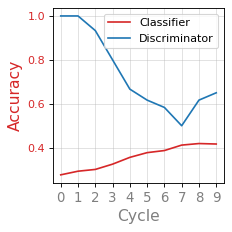

In [16]:
R.plot()

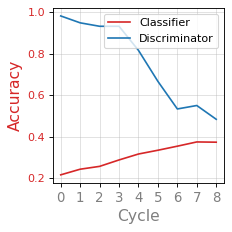

In [26]:
R.plot() # plot after fixing bug

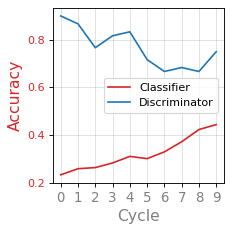

In [13]:
R.plot() # plot before bug fixed